In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Candidate_tech_evaluation_candidate_copy_data science_fraud.csv')

df.head(5)

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,149671,285108,7/15/2015 4:36,9/10/2015 14:17,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0
1,15611,131009,1/24/2015 12:29,4/13/2015 4:53,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,0
2,73178,328855,3/11/2015 0:54,4/5/2015 12:23,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,0
3,84546,229053,1/7/2015 13:19,1/9/2015 10:12,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0
4,35978,108439,2/8/2015 21:11,4/9/2015 14:26,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0


__Basic infos and basic checking of the data__

In [3]:
df.columns[0]

'Unnamed: 0'

In [4]:
# Unwanted column has to be dismissed
df.drop(df.columns[0],axis=1,inplace=True)

In [5]:
df_yes_fraud = df[ df['class'] == 1 ]

In [6]:
df_no_fraud = df[ df['class'] == 0 ]

Distribution of _purchase_value_, I believe this feature could be a very important one

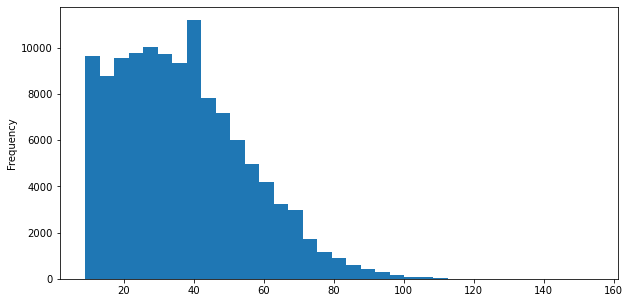

In [7]:
df['purchase_value'].plot.hist(figsize=(10,5),bins=35);

I'm gonna check if there is any bias from the purchase_value regarding the fraude: positive/negative

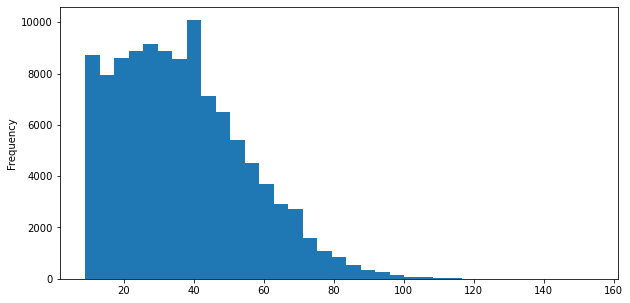

In [8]:
df_no_fraud['purchase_value'].plot.hist(figsize=(10,5),bins=35);

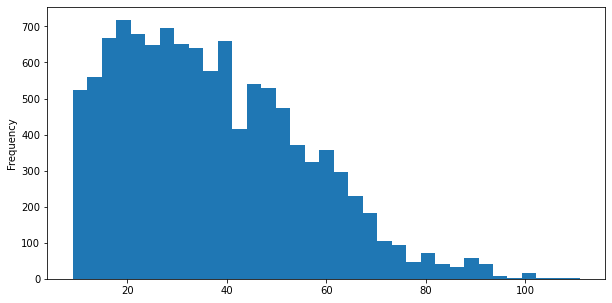

In [9]:
df_yes_fraud['purchase_value'].plot.hist(figsize=(10,5),bins=35);

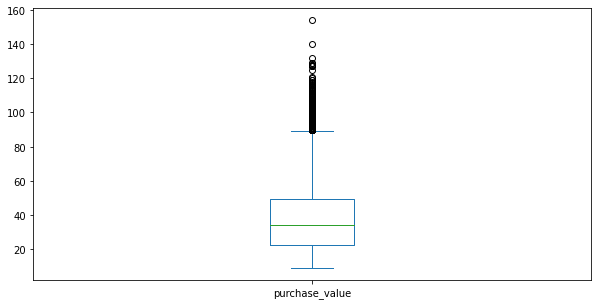

In [10]:
df['purchase_value'].plot.box(figsize=(10,5));

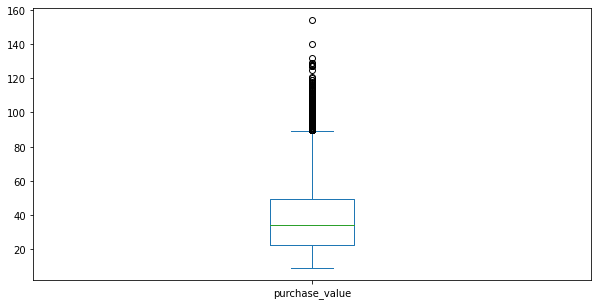

In [11]:
df_no_fraud['purchase_value'].plot.box(figsize=(10,5));

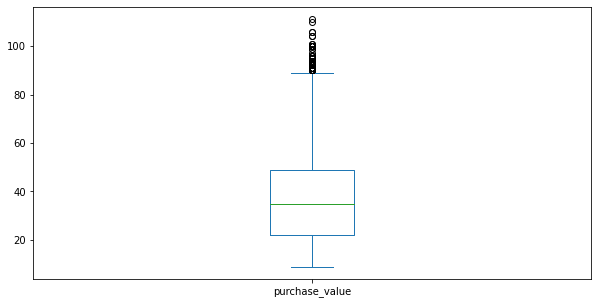

In [12]:
df_yes_fraud['purchase_value'].plot.box(figsize=(10,5));

__Partial conclusions on the amout of purchase value__:

Both distributions, fraude cases and non fraudulent cases are fairly comparable.

The real change is in the range of the distributuions, from 10-160 to 10-100, but not the main shape of it.

High outliers are present in all distributions, regardless of the type of the transaction legal or ilegal

As expected, the non fraudulent cases (the vast majority of samples) has the most similar distributions to the original dataset

In order to make some categorical plots I'm gonna make the classes object type

In [13]:
df['fraud'] = df['class'].map(lambda x: 'no' if x == 0 else 'yes')

__Analysis__ of _purchase_value distributions labeled by class, according to sex_

### Sex

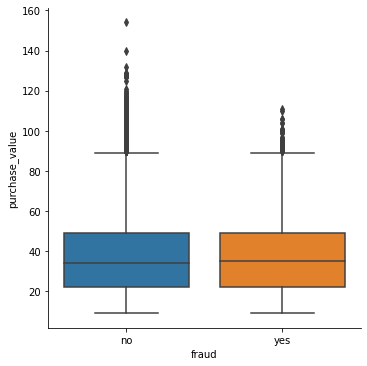

In [14]:
sns.catplot(x="fraud", y="purchase_value", kind="box", data=df,orient='v');

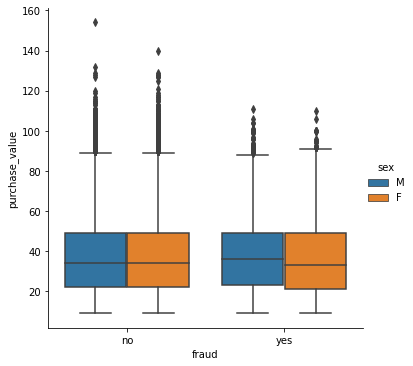

In [15]:
sns.catplot(x="fraud", y="purchase_value",hue='sex', kind="box", data=df,orient='v');

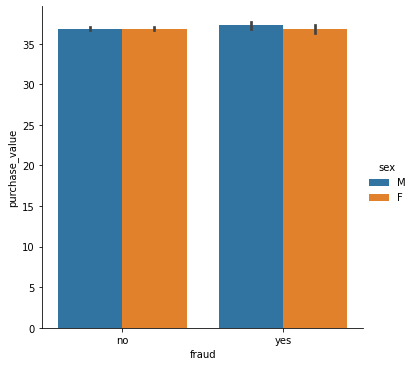

In [16]:
sns.catplot(x='fraud', y="purchase_value",hue='sex', kind="bar", data=df,orient="v");

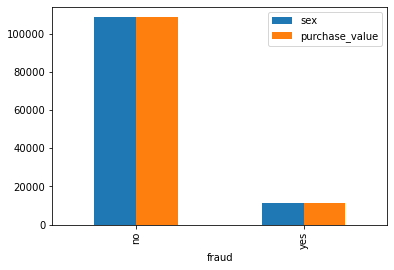

In [17]:
df.groupby('fraud').count()[['sex','purchase_value']].plot.bar();

__Partial conclusion on purchases (fraudulent or not) regarding sex__:

_From the graphics we can notice that sex doesn't really matter when it comes to fraudulent or non fraudulent transactions_

_Their distributions are very much like_

# Age

__Analysis of__ _purchase_value distributions labeled by class, according to age_

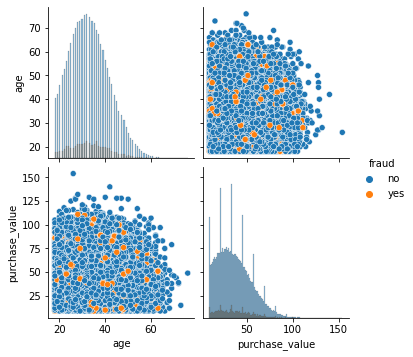

In [18]:
sns.pairplot(df[['age','purchase_value','fraud']], hue="fraud", diag_kind="hist")

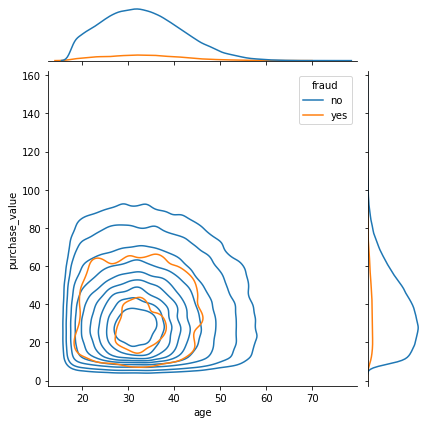

In [19]:
sns.jointplot(data=df[['age','purchase_value','fraud']], x="age", y="purchase_value", hue="fraud", kind="kde")

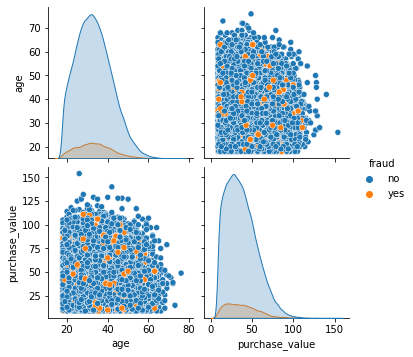

In [20]:
sns.pairplot(df[['age','purchase_value','fraud']], hue="fraud", diag_kind="kde",kind='scatter')

<AxesSubplot:xlabel='purchase_value', ylabel='age'>

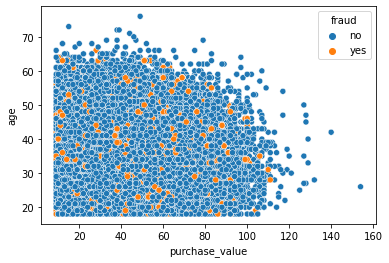

In [21]:
sns.scatterplot(data=df,x='purchase_value',y='age',hue='fraud')

__Partial conclusion on purchases (fraudulent or not) regarding age__:

_When it comes to fraud cases we can notice that the curves and distributions for age and purchase differ regarding to fraudulent and non fraudulent cases. While fraudulent cases have a narrowed distributions over purchases the fraudulent transactions tend to accour around somewhat young ages_

# Source

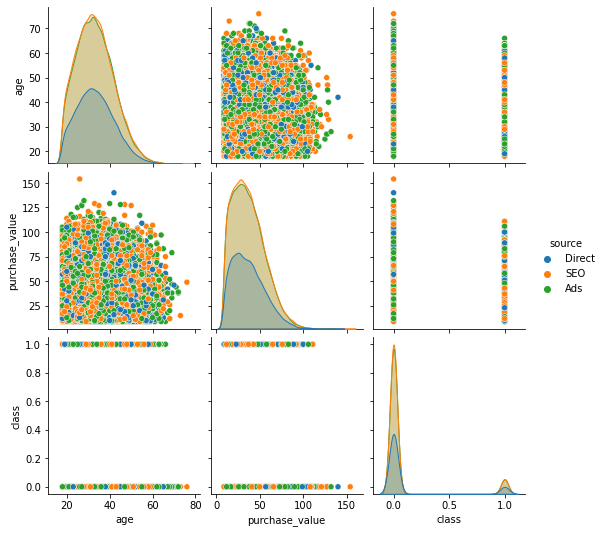

In [22]:
sns.pairplot(df[['age','purchase_value','class','source']], hue="source", diag_kind="kde",kind='scatter');

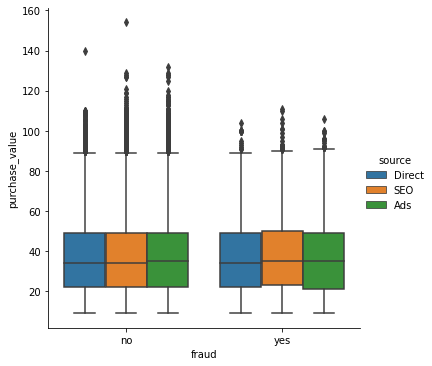

In [23]:
sns.catplot(x="fraud", y="purchase_value",hue='source', kind="box", data=df,orient='v');

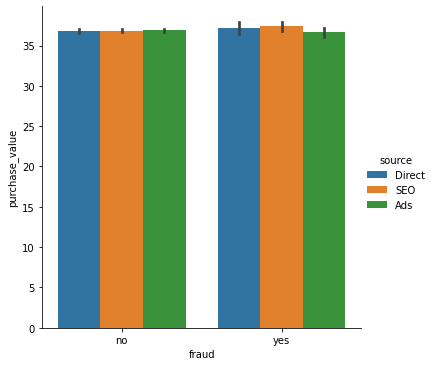

In [24]:
sns.catplot(x='fraud', y="purchase_value",hue='source', kind="bar", data=df,orient="v")

__Partial conclusion on purchases (fraudulent or not) regarding Source__:

_Its possible to tell from the plotting analysis that some source curves are similar such as SEO and Ads for non fraudulent cases, as for the fraud case transactions the __SEO__ happens to be more common followed by __Direct__ as __Ads__ is much less common_

# Browser

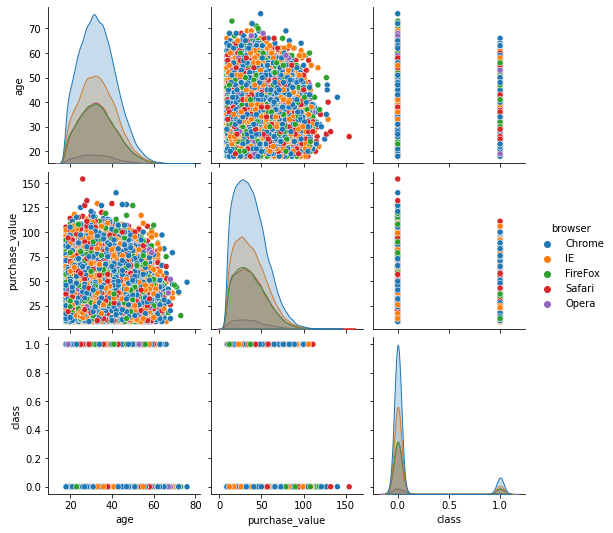

In [25]:
sns.pairplot(df[['age','purchase_value','class','browser']], hue="browser", diag_kind="kde",kind='scatter');

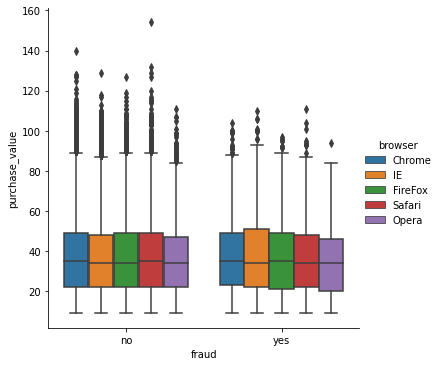

In [26]:
sns.catplot(x="fraud", y="purchase_value",hue='browser', kind="box", data=df,orient='v');

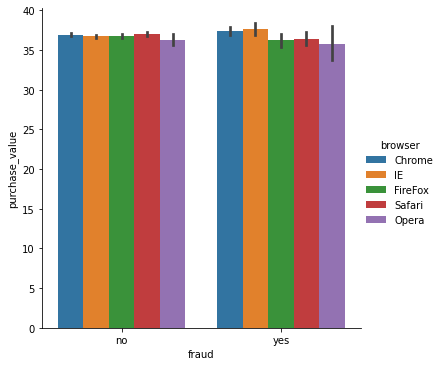

In [27]:
sns.catplot(x='fraud', y="purchase_value",hue='browser', kind="bar", data=df,orient="v")

__Partial conclusion on purchases (fraudulent or not) regarding Browser__:

_Its possible to tell from the plotting analysis that some source curves are similar such as SEO and Ads for non fraudulent cases, as for the fraud case transactions the __SEO__ happens to be more common followed by __Direct__ as __Ads__ is much less common_

### Final conclusion for categorial features overall:


_All of the categorical features have the potential to improve the model performance for prediction. Particularly in the fraudulent cases all features present somewhat different characteristics_